In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [27]:
# df = pd.read_csv('merged.csv')
X = df.drop(columns=['Price(Float)'])
y = df['Price(Float)']


Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [28]:
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 10735550551591.705
Root Mean Squared Error (RMSE): 3276515.0009715664
Mean Absolute Error (MAE): 2199794.938721389
R-squared (R2): 0.9383778272327494


C:\Users\mshar\AppData\Local\Temp\ipykernel_6976\2113132202.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


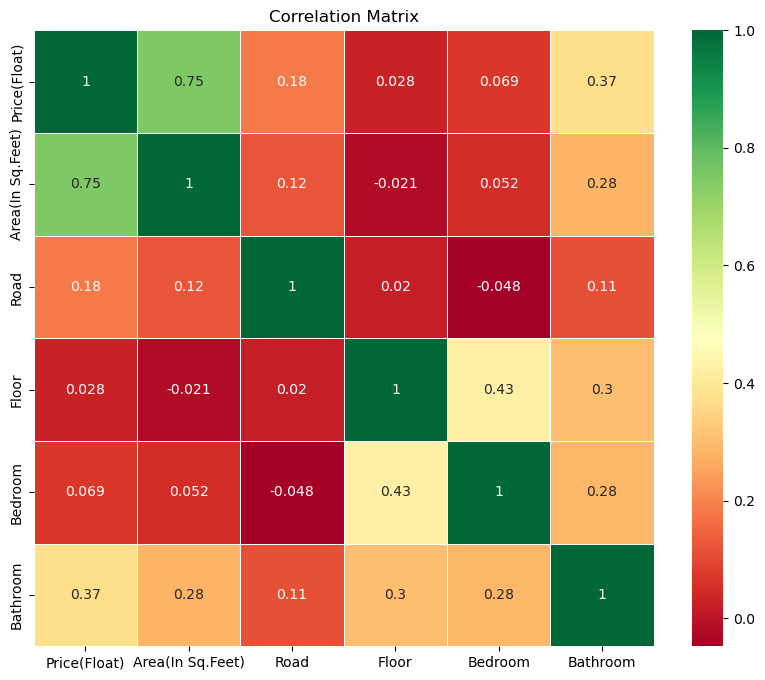

In [30]:
df = pd.read_csv('ss.csv')

# Assuming you have a DataFrame called 'dataset' containing your data
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

C:\Users\mshar\AppData\Local\Temp\ipykernel_1424\2276990896.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


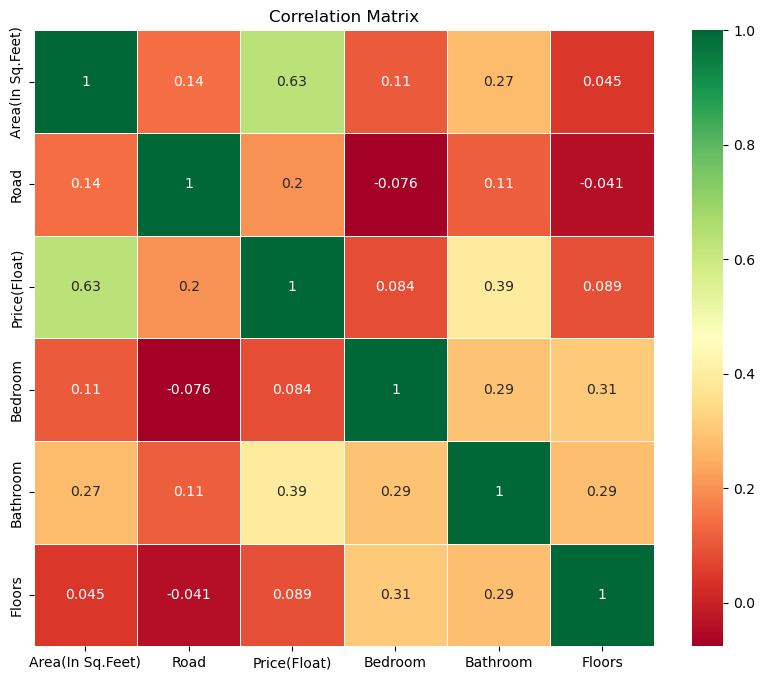

In [9]:
df = pd.read_csv('dataset_without_outliers2.csv')


# Assuming you have a DataFrame called 'dataset' containing your data
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [8]:
#Remove outliers

# Read the dataset into a pandas DataFrame
df = pd.read_csv('dataset_without_outliers.csv')

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Specify the column(s) to remove outliers from
columns_to_remove_outliers = ['Price(Float)', 'Area(In Sq.Feet)', 'Floors', 'Bathroom', 'Bedroom','Road']

# Remove outliers for each specified column
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column)

# Save the modified DataFrame without outliers
df.to_csv('dataset_without_outliers2.csv', index=False)


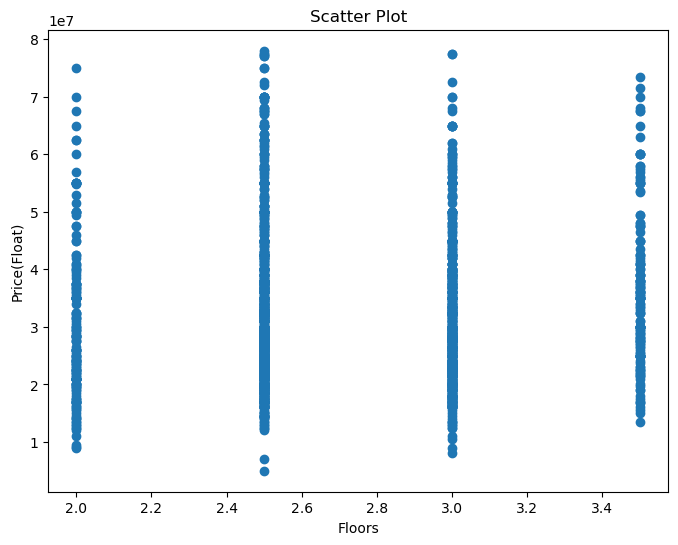

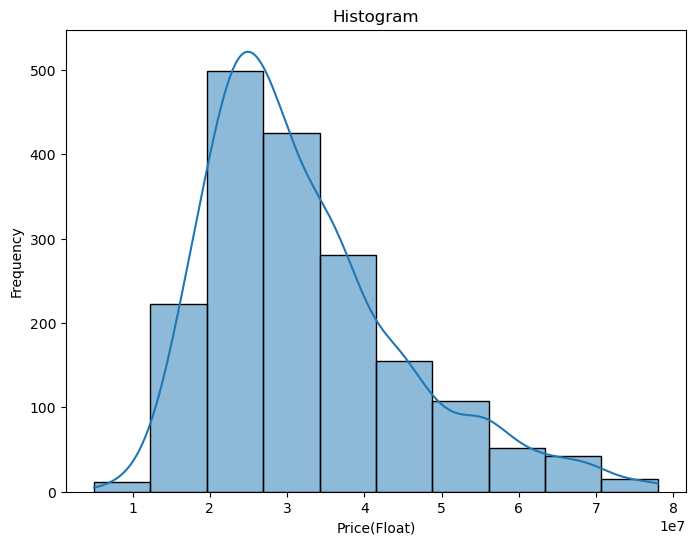

In [15]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('dataset_without_outliers.csv')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Floors'], df['Price(Float)'])
plt.title('Scatter Plot')
plt.xlabel('Floors')
plt.ylabel('Price(Float)')
plt.show()

# Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Price(Float)'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Price(Float)')
plt.ylabel('Frequency')
plt.show()

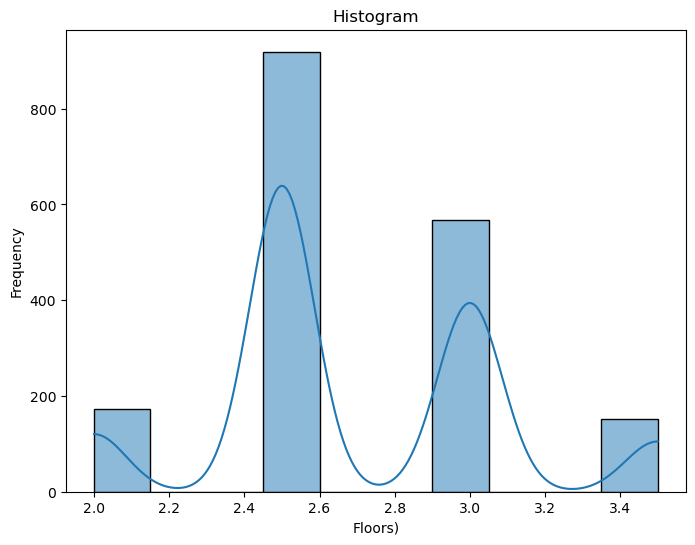

In [17]:
# Histogram of Floors
plt.figure(figsize=(8, 6))
sns.histplot(df['Floors'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Floors)')
plt.ylabel('Frequency')
plt.show()

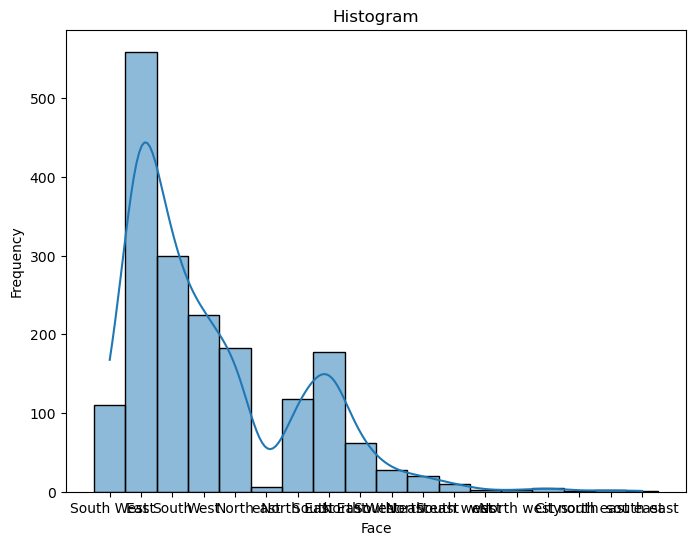

In [18]:
# Histogram of Face
plt.figure(figsize=(8, 6))
sns.histplot(df['Face'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Face')
plt.ylabel('Frequency')
plt.show()

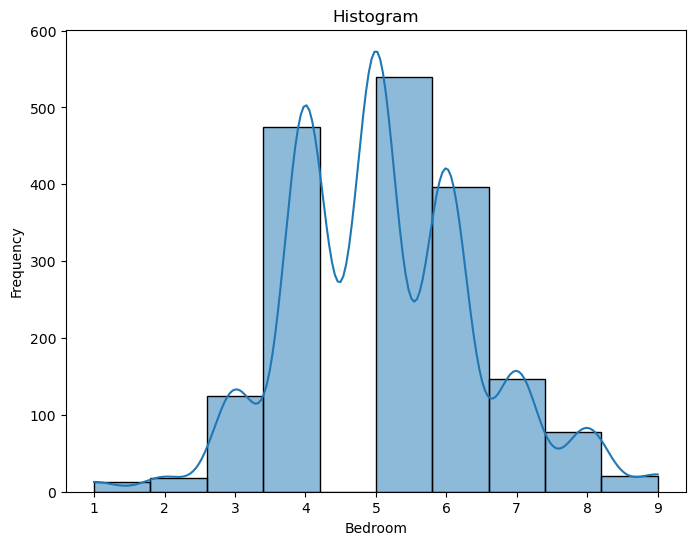

In [19]:
# Histogram of Face
plt.figure(figsize=(8, 6))
sns.histplot(df['Bedroom'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

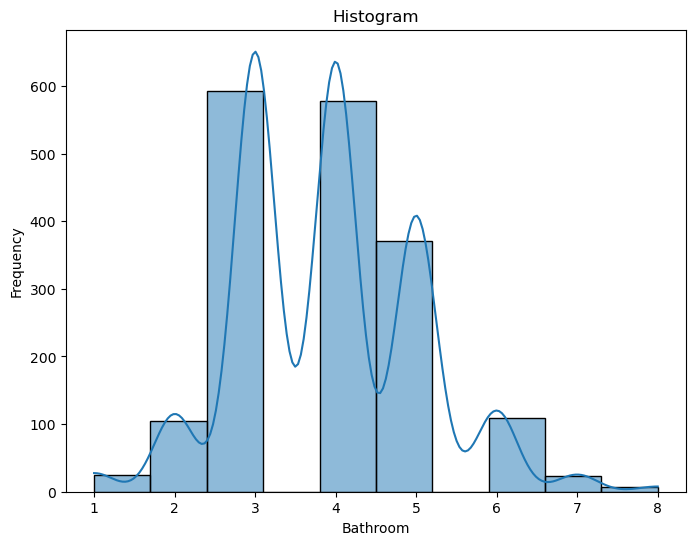

In [20]:
# Histogram of Face
plt.figure(figsize=(8, 6))
sns.histplot(df['Bathroom'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

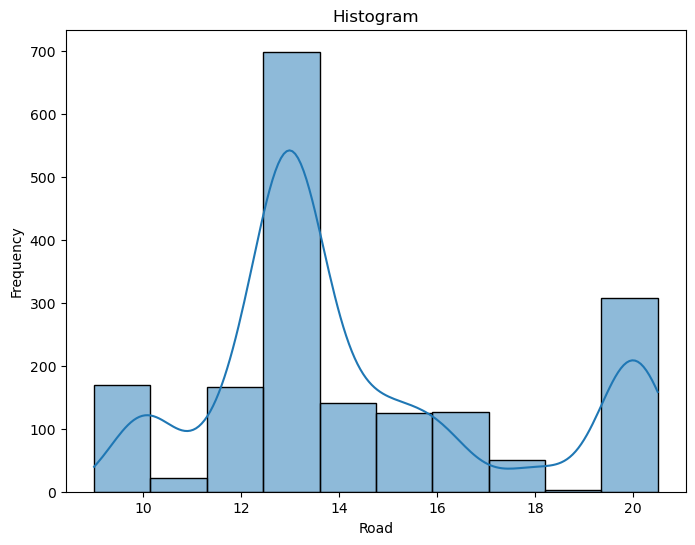

In [21]:
# Histogram of Face
plt.figure(figsize=(8, 6))
sns.histplot(df['Road'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Road')
plt.ylabel('Frequency')
plt.show()

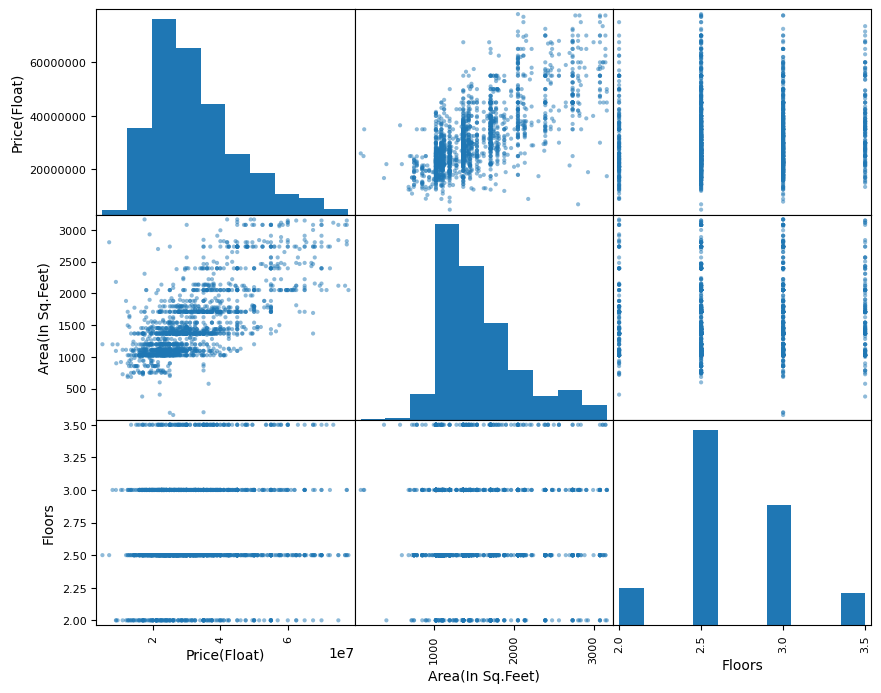

In [25]:
# Select the attributes for scatter plot matrix
attributes = ['Price(Float)', 'Area(In Sq.Feet)', 'Floors', 'Face']

# Create a scatter plot matrix
scatter_matrix(df[attributes], figsize=(10, 8), diagonal='hist')
plt.show()

In [26]:
df = pd.read_csv('dataset_without_outliers.csv')
summary_stats = df.describe()

# Extract the desired statistics
minimum = summary_stats.loc['min']
percentile_25 = summary_stats.loc['25%']
median = summary_stats.loc['50%']
percentile_75 = summary_stats.loc['75%']
maximum = summary_stats.loc['max']

# Print the statistics
print("Minimum:")
print(minimum)
print("\n25th Percentile:")
print(percentile_25)
print("\nMedian:")
print(median)
print("\n75th Percentile:")
print(percentile_75)
print("\nMaximum:")
print(maximum)

Minimum:
Area(In Sq.Feet)    8.556250e+01
Road                9.000000e+00
Price(Float)        5.000000e+06
Bedroom             1.000000e+00
Bathroom            1.000000e+00
Floors              2.000000e+00
Name: min, dtype: float64

25th Percentile:
Area(In Sq.Feet)        1112.31
Road                      13.00
Price(Float)        23000000.00
Bedroom                    4.00
Bathroom                   3.00
Floors                     2.50
Name: 25%, dtype: float64

Median:
Area(In Sq.Feet)        1369.0
Road                      13.0
Price(Float)        29500000.0
Bedroom                    5.0
Bathroom                   4.0
Floors                     2.5
Name: 50%, dtype: float64

75th Percentile:
Area(In Sq.Feet)    1.754031e+03
Road                1.600000e+01
Price(Float)        3.850000e+07
Bedroom             6.000000e+00
Bathroom            5.000000e+00
Floors              3.000000e+00
Name: 75%, dtype: float64

Maximum:
Area(In Sq.Feet)    3.165812e+03
Road                2.050

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read the dataset into a pandas DataFrame
df = pd.read_csv('dataset_without_outliers.csv')

# Select the desired columns for regularization
selected_columns = ["Price", "Area", "Bedroom", "Bathroom", "Road"]

# Select the columns for one-hot encoding
categorical_columns = ["Address", "City", "Face"]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df[categorical_columns])

# Merge the encoded columns with the selected columns
df_final = pd.concat([df[selected_columns], df_encoded], axis=1)

# Split the data into features (X) and target variable (y)
X = df_final.drop("Price", axis=1)
y = df_final["Price"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Ridge regression model
alpha = 0.1  # Regularization strength (alpha > 0)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 8389528.919846512
